# Predicting Term Deposit Subscription by a client

### Abstract
Marketing campaigns are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign. A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate (often better than just opening a deposit account) in which your money will be returned back at a specific maturity time. 
### Problem Statement
Predict if a customer subscribes to a term deposits or not, when contacted by a marketing agent, by understanding the different features and performing predictive analytics

* __age__ : Age of the client
* __job__ : Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* __marital__ : Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* __education__ : (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
* __default__ : has credit in default? (categorical: 'no','yes','unknown')
* __housing__ : has a housing loan? (categorical: 'no','yes','unknown')
* __loan__ : has a personal loan? (categorical: 'no','yes','unknown')
* __contact__ : contact communication type (categorical: 'cellular','telephone')
* __month__ : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* __day_of_week__ : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* __duration__ : last contact duration, in seconds
* __campaign__ : number of contacts performed during this campaign and for this client (numeric, includes last contact)
* __pdays__ : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* __previous__ : number of contacts performed before this campaign and for this client
* __poutcome__ : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
* __emp.var.rate__ : employment variation rate - quarterly indicator (numeric) cons.price.idx consumer price index - monthly indicator 
* __cons.conf.idx__ : consumer confidence index - monthly indicator
* __euribor3m__ : euribor 3 month rate - daily indicator nr.employed number of employees - quarterly indicator 
* __y__ : has the client subscribed a term deposit? (binary: 'yes','no')

# Assigning working directory

In [1]:
import os
os.chdir('C:/Users/vishali jothimuthu/Desktop/Predicting Term Deposit Subscription by a client/Dataset/')

# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

# Importing datasets

In [4]:
df = pd.read_csv('C:/Users/vishali jothimuthu/Desktop/Predicting Term Deposit Subscription by a client/Dataset/bank-additional-full.csv',
                sep=';')

In [5]:
df_desc = pd.read_csv('C:/Users/vishali jothimuthu/Desktop/Predicting_Term_Deposit_Subscription_by_a_client/Dataset/desc.csv')
df_desc.index = df_desc['Column']
df_desc.drop('Column', axis=1, inplace=True)
df_desc = df_desc.T

# Basic commands

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df_desc.head()

Column,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
Description,Age of the client,"Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')","Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)","(categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')","has credit in default? (categorical: 'no','yes','unknown')","has a housing loan? (categorical: 'no','yes','unknown')","has a personal loan? (categorical: 'no','yes','unknown')","contact communication type (categorical: 'cellular','telephone')","last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')","last contact day of the week (categorical: 'mon','tue','wed','thu','fri')","last contact duration, in seconds","number of contacts performed during this campaign and for this client (numeric, includes last contact)",number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted),number of contacts performed before this campaign and for this client,"outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')",employment variation rate - quarterly indicator (numeric),consumer price index - monthly indicator,consumer confidence index - monthly indicator,euribor 3 month rate - daily indicator,number of employees - quarterly indicator,"has the client subscribed a term deposit? (binary: 'yes','no')"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
df.shape

(41188, 21)

# Exploratory Data Analysis (EDA)

In [12]:
action = {}

In [13]:
p_value = {}

In [14]:
def t_test(num, cat, data):
    from scipy.stats import ttest_ind
    
    Ho = f'There is no significant impact of {num} on {cat} (No predictability)'
    Ha = f'There is a significant impact of {num} on {cat} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    un1 = data[cat].unique()[0]
    un2 = data[cat].unique()[1]
    
    ind1 = data[data[cat]==un1]
    ind2 = data[data[cat]==un2]
    
    stat, p = ttest_ind(ind1[num], ind2[num])
    print('Test Statistics: ', stat)
    print('p-value: ', p)
    print('\n')
    
    if p>alpha:
        print('Fail to reject Ho, ', Ho)
    else:
        print('Reject Ho, ', Ha)
        
    return p
    

In [15]:
def chi2(x, y, data):
    from scipy.stats import chi2_contingency
    
    Ho = f'There is no significant assosiation between {x} and {y} (No predictability)'
    Ha = f'There is a significant assosiation between {x} and {y} (Good predictor)'
    print('Ho: ', Ho)
    print('Ha: ', Ha)
    print('\n')
    
    alpha = 0.05
    
    ct = pd.crosstab(data[x], data[y])
    chi2, p, dof, ex = chi2_contingency(ct)
    print('chi-square stats: ', chi2)
    print('p-value: ', p)
    print('\n')

    if p>alpha:
        print('Fail to reject null hypothesis, ', Ho)
    else:
        print('Reject null hypothesis, ', Ha)
        
    return p

In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#### y

In [17]:
df_desc['y']

Description    has the client subscribed a term deposit? (binary: 'yes','no')
Name: y, dtype: object

In [18]:
df.y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [19]:
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

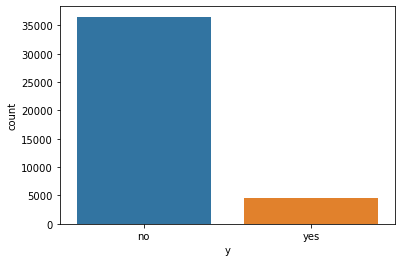

In [20]:
sns.countplot(df.y)

In [21]:
# The response variable is unevenly distributed. we have to fix this at preprocessing phase

In [22]:
len(df)

41188

In [23]:
# Out of 41,188 calls made in the Market campign, 36,548 clients rejected the subscription and only 4,650 clients subscribed 
# a term deposit.

In [24]:
df.y.value_counts()[1]/len(df)*100

11.265417111780131

In [25]:
# Hence the success rate of subscription is only 11.26 %.

#### age

In [26]:
df_desc['age']

Description    Age of the client
Name: age, dtype: object

In [27]:
df.age.head()

0    56
1    57
2    37
3    40
4    56
Name: age, dtype: int64

In [28]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [29]:
# The minimum age is 17 and the maximum age is 98.

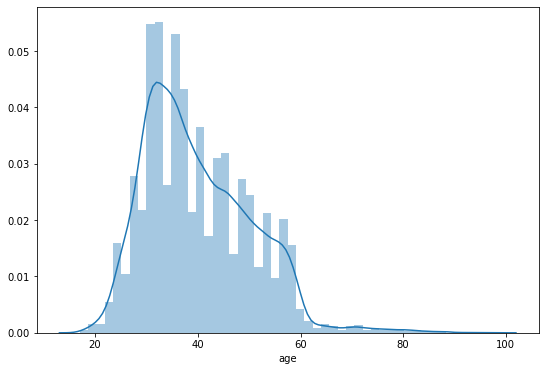

In [30]:
plt.figure(figsize=(9,6))
sns.distplot(df.age)

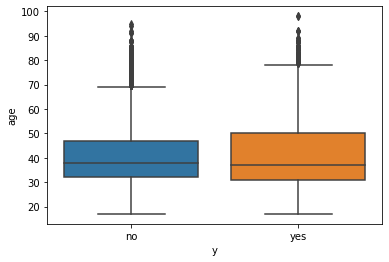

In [31]:
sns.boxplot(df.y, df.age)

In [32]:
p_value['age'] = t_test(num='age', cat='y', data=df)

Ho:  There is no significant impact of age on y (No predictability)
Ha:  There is a significant impact of age on y (Good predictor)


Test Statistics:  -6.172087109640128
p-value:  6.80213641846347e-10


Reject Ho,  There is a significant impact of age on y (Good predictor)


In [33]:
# age can be a good predictor of y

In [34]:
# Lets create a new column by grouping the age

df['age_group'] = pd.cut(df.age,
                        bins=[0, 20, 40, 60, 80, np.inf],
                        labels=['0-20', '20-40', '40-60', '60-80', '>80'])

In [35]:
df['age_group'].value_counts()

20-40    23628
40-60    16510
60-80      791
0-20       140
>80        119
Name: age_group, dtype: int64

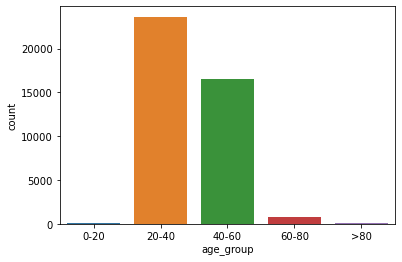

In [36]:
sns.countplot(df.age_group)

In [91]:
pd.crosstab(df.age_group, df.y, normalize=True) * 100

y,no,yes
age_group,,
0-20,0.201515,0.138390
20-40,50.898320,6.467903
40-60,36.430514,3.653977
60-80,1.058561,0.861902
>80,0.145673,0.143246


In [84]:
# Of the total population, 6.4% of clients within age 20 to 40 have accepted to subscribe to the term deposit.
# And 50.8% of clients within the same age group have rejected the subscription.

In [90]:
pd.crosstab(df.age_group, df.y, normalize='columns')['yes'] * 100

age_group
0-20      1.228448
20-40    57.413793
40-60    32.435345
60-80     7.650862
>80       1.271552
Name: yes, dtype: float64

In [ ]:
# Of those who subscibed to term deposit, 57.4% were between age 20 to 40.

In [93]:
ct_age = pd.crosstab(df.age_group, df.y, margins=True)
ct_age

y,no,yes,All
age_group,,,
0-20,83,57,140
20-40,20964,2664,23628
40-60,15005,1505,16510
60-80,436,355,791
>80,60,59,119
All,36548,4640,41188


In [94]:
ct_age['yes']/ct_age['All'] * 100

age_group
0-20     40.714286
20-40    11.274759
40-60     9.115687
60-80    44.879899
>80      49.579832
All      11.265417
dtype: float64

In [39]:
# The highest success rate is with clients who are above 80 years of age.
# Out of 199 calls, 59 clients subscribed to the term deposit

In [40]:
# The lowest success rate is with clients who are between 20 to 40 years of age
# Out of 23,628 calls, only 2,664 clients subscribed to the term deposit

In [41]:
action['drop'] = ['age_group']

#### job

In [42]:
df_desc['job']

Description    Type of job (categorical: 'admin.','blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired','self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
Name: job, dtype: object

In [43]:
df.job.head()

0    housemaid
1     services
2     services
3       admin.
4     services
Name: job, dtype: object

In [44]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

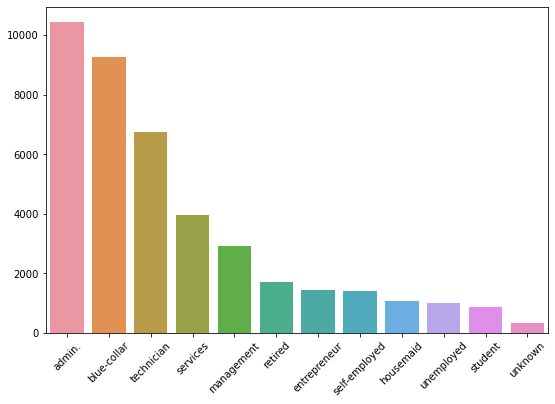

In [45]:
plt.figure(figsize=(9,6))
sns.barplot(df.job.value_counts().index, df.job.value_counts().values)
plt.xticks(rotation=45)

In [46]:
ct_job = pd.crosstab(df.job, df.y, margins=True)
ct_job

y,no,yes,All
job,,,
admin.,9070,1352,10422
blue-collar,8616,638,9254
entrepreneur,1332,124,1456
housemaid,954,106,1060
management,2596,328,2924
retired,1286,434,1720
self-employed,1272,149,1421
services,3646,323,3969
student,600,275,875


In [47]:
ct_job['yes']/ct_job['All'] * 100

job
admin.           12.972558
blue-collar       6.894316
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.232558
self-employed    10.485574
services          8.138070
student          31.428571
technician       10.826042
unemployed       14.201183
unknown          11.212121
All              11.265417
dtype: float64

In [ ]:
# Of the 10,422 call to admin, 1352 of them subscribed.

# The highest success rate was with students, Of the 875 calls made to students, 275 of them subscribed to term deposit.

In [96]:
pd.crosstab(df.job, df.y, normalize=True) * 100

y,no,yes
job,,
admin.,22.020977,3.282509
blue-collar,20.918714,1.548995
management,6.302807,0.796348
other,9.718850,2.418180
self-employed,6.322230,0.662814
services,8.852093,0.784209
technician,14.598912,1.772361


In [ ]:
# Of the total population 3.2% of admin subscribed to term deposit, and 22.02% of admin rejected the subscription

In [49]:
# Lets club some levels together

df = df.replace({'job': {
    'retired' : 'other',
    'housemaid' : 'other',
    'unemployed' : 'other',
    'student' : 'other',
    'unknown' : 'other',
    'entrepreneur' : 'self-employed'
}})

In [50]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
other             4999
services          3969
management        2924
self-employed     2877
Name: job, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

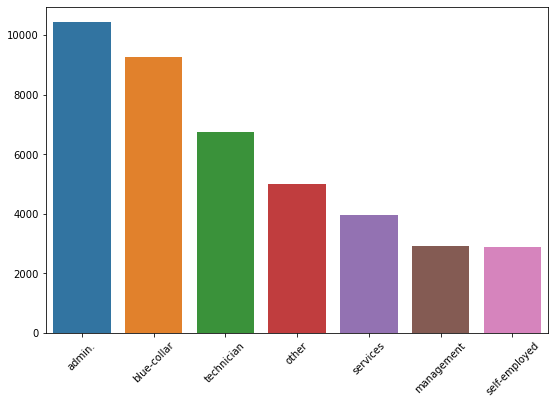

In [51]:
plt.figure(figsize=(9,6))
sns.barplot(df.job.value_counts().index, df.job.value_counts().values)
plt.xticks(rotation=45)

In [52]:
p_value['job'] = chi2('job', 'y', df)

Ho:  There is no significant assosiation between job and y (No predictability)
Ha:  There is a significant assosiation between job and y (Good predictor)


chi-square stats:  631.4009997360857
p-value:  3.920006662976762e-133


Reject null hypothesis,  There is a significant assosiation between job and y (Good predictor)


In [53]:
# job can be a good predictor of y

#### marital

In [54]:
df_desc['marital']

Description    Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
Name: marital, dtype: object

In [55]:
df.marital.head()

0    married
1    married
2    married
3    married
4    married
Name: marital, dtype: object

In [56]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

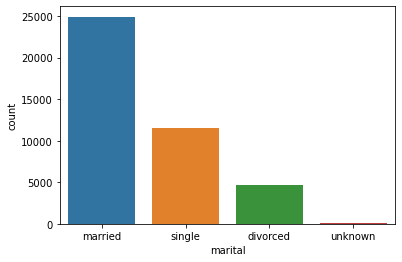

In [57]:
sns.countplot(df.marital)

In [58]:
# Lets club some values together

df = df.replace({'marital': {
    'divorced' : 'single',
    'unknown' : 'single'
}})

In [59]:
df.marital.value_counts()

married    24928
single     16260
Name: marital, dtype: int64

In [98]:
pd.crosstab(df.marital, df.y, normalize=True) * 100

y,no,yes
marital,,
married,54.375061,6.147422
single,34.359522,5.117996


In [ ]:
# of the total people in this marketing campign, 6.14% of married people subscribed and 5.11% of unmarried people subscribed.

In [100]:
ct_mar = pd.crosstab(df.marital, df.y, margins=True)
ct_mar

y,no,yes,All
marital,,,
married,22396,2532,24928
single,14152,2108,16260
All,36548,4640,41188


In [101]:
ct_mar['yes']/ct_mar['All'] * 100

marital
married    10.157253
single     12.964330
All        11.265417
dtype: float64

In [ ]:
# Success rate of both married and single people are almost the same.

In [61]:
chi2('marital', 'y', df)

Ho:  There is no significant assosiation between marital and y (No predictability)
Ha:  There is a significant assosiation between marital and y (Good predictor)


chi-square stats:  77.29156308478301
p-value:  1.4749474147480335e-18


Reject null hypothesis,  There is a significant assosiation between marital and y (Good predictor)


1.4749474147480335e-18

In [62]:
# marital can be a good predictor of y

#### education

In [63]:
df_desc['education']

Description    (categorical: 'basic.4y', 'basic.6y' ,'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
Name: education, dtype: object

In [64]:
df.education.head()

0       basic.4y
1    high.school
2    high.school
3       basic.6y
4    high.school
Name: education, dtype: object

In [65]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

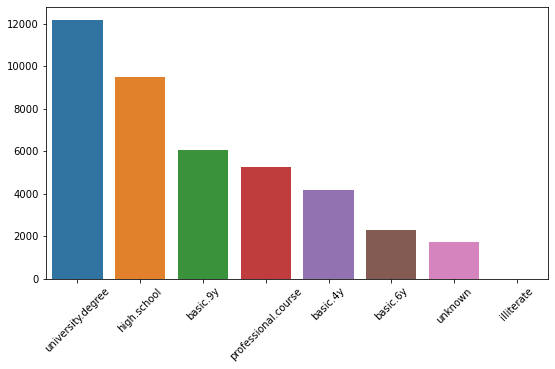

In [66]:
plt.figure(figsize=(9,5))
sns.barplot(df.education.value_counts().index, df.education.value_counts().values)
plt.xticks(rotation=45)

In [68]:
ct_edu = pd.crosstab(df.education, df.y, margins=True)
ct_edu

y,no,yes,All
education,,,
basic.4y,3748,428,4176
basic.6y,2104,188,2292
basic.9y,5572,473,6045
high.school,8484,1031,9515
illiterate,14,4,18
professional.course,4648,595,5243
university.degree,10498,1670,12168
unknown,1480,251,1731
All,36548,4640,41188


In [80]:
pd.crosstab(df.education, df.y, normalize=True) * 100

y,no,yes
education,,
basic.4y,9.099738,1.039138
basic.6y,5.108284,0.456444
basic.9y,13.528212,1.148393
high.school,20.598232,2.503156
illiterate,0.033990,0.009712
professional.course,11.284840,1.444596
university.degree,25.488006,4.054579
unknown,3.593280,0.609401


In [78]:
pd.crosstab(df.education, df.y, normalize='columns') * 100

y,no,yes
education,,
basic.4y,10.255007,9.224138
basic.6y,5.756813,4.051724
basic.9y,15.245704,10.193966
high.school,23.213309,22.219828
illiterate,0.038306,0.086207
professional.course,12.717522,12.823276
university.degree,28.723870,35.991379
unknown,4.049469,5.409483


In [73]:
(ct_edu['yes']/ct_edu['All'] * 100)

education
basic.4y               10.249042
basic.6y                8.202443
basic.9y                7.824648
high.school            10.835523
illiterate             22.222222
professional.course    11.348465
university.degree      13.724523
unknown                14.500289
All                    11.265417
dtype: float64

#### default

#### housing

#### loan

#### contact

#### month

#### day_of_week

#### duration

#### campaign

#### pdays

#### previous

#### poutcome

#### emp.var.rate

#### cons.price.idx

#### cons.conf.idx

#### euribor3m

#### nr.employed